In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table

In [8]:
table = Table.read('logL-obs_2020jww_gwrizy.txt', format = 'ascii', names = ('MJD', 'lum', 'dlum'))

Text(0.5, 0, 'MJD')

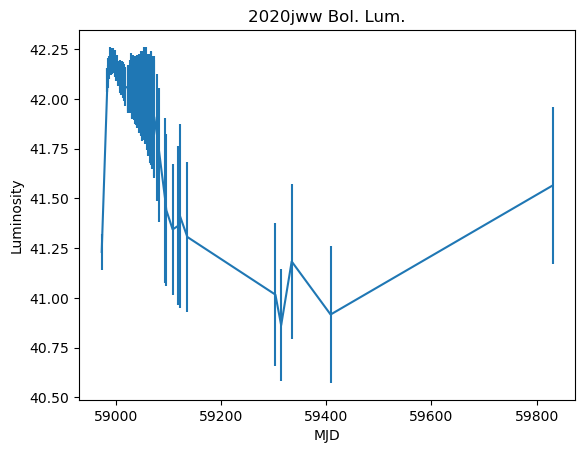

In [9]:
plt.errorbar(table['MJD'], table['lum'], table['dlum'])
plt.title('2020jww Bol. Lum.')
plt.ylabel('Luminosity')
plt.xlabel('MJD')

## superbol settings
1. id SN + files + filters 
    
    -girwyz  
    
    -no range limit 
2. ref band 
    
    -use all bands 
    
    -r as ref (most points)
    
    -auto max 
    
    -no shift to max 
    
    -DM = 0.046 
    
    -no time dilation correction
3. flux scale

    -not abs mag 
4. interp to ref epochs

    -auto interp w/ constant color 
5. extinction/k-correction
    -E(B-V) = 0.035
    
    -default phot systems
    
    -convert to rest-frame
6. bbfit, integrate 
    
    -no absorption applied
    
    -10000 K 
    
    -1.0e15cm

In [10]:
interp_lc = table.read('interpolated-lcs_2020jww_gwrizy.txt', format = 'ascii')

In [11]:
interp_lc

#phase,g,err,w,err_1,r,err_2,i,err_3,z,err_4,y,err_5
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
58973.45,20.84,0.25,22.07,0.08,22.15,0.2,22.44,0.21,22.24,0.24,23.18,1.2
58984.4,19.2,0.25,19.34,0.04,19.42,0.2,19.71,0.2,19.52,0.21,20.45,1.2
58984.4,19.2,0.25,19.34,0.04,19.42,0.2,19.71,0.2,19.51,0.21,20.45,1.2
58985.38,19.19,0.25,19.27,0.04,19.35,0.2,19.66,0.2,19.45,0.21,20.38,1.2
58986.29,19.12,0.25,19.17,0.04,19.25,0.2,19.6,0.2,19.34,0.21,20.27,1.2
58987.33,19.14,0.25,19.11,0.04,19.19,0.2,19.54,0.2,19.28,0.21,20.22,1.2
58989.51,19.02,0.25,19.03,0.1,19.11,0.2,19.41,0.2,19.21,0.21,20.14,1.2
58991.27,19.14,0.25,19.09,0.1,19.1,0.2,19.31,0.2,19.19,0.21,20.13,1.2
58992.27,19.1,0.25,19.12,0.1,19.14,0.2,19.25,0.2,19.23,0.2,20.17,1.2


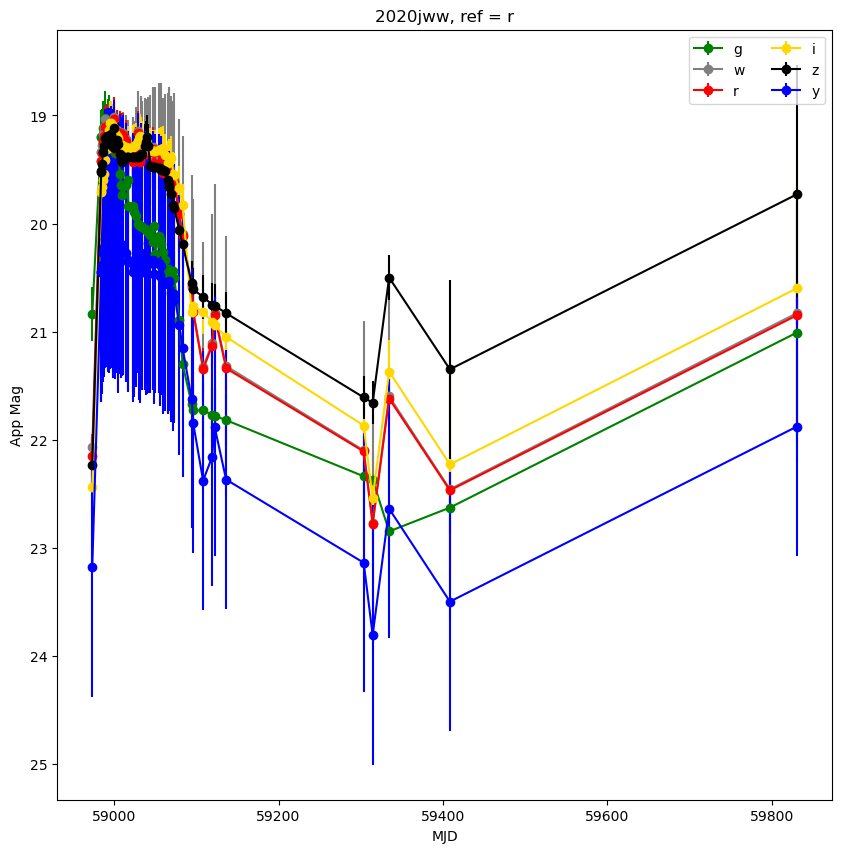

In [15]:
times = interp_lc['#phase']

plt.figure(figsize=(10,10))
plt.errorbar(times, interp_lc['g'], interp_lc['err'], label = 'g', color = 'green', marker = 'o')
plt.errorbar(times, interp_lc['w'], interp_lc['err_1'], label = 'w', color = 'gray', marker = 'o')
plt.errorbar(times, interp_lc['r'], interp_lc['err_2'], label = 'r', color = 'red', marker = 'o')
plt.errorbar(times, interp_lc['i'], interp_lc['err_3'], label = 'i', color = 'gold', marker = 'o')
plt.errorbar(times, interp_lc['z'], interp_lc['err_4'], label = 'z', color = 'k', marker = 'o')
plt.errorbar(times, interp_lc['y'], interp_lc['err_5'], label = 'y', color = 'blue', marker = 'o')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('App Mag')
plt.title('2020jww, ref = r')
plt.legend(ncol = 2)